In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v2_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().DSAMuon
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().DSAMuon

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo1DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [5]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['dxy', 'dxyErr', 'dxybs', 'dz', 'dzErr', 'eta', 'ip3d', 'jetPtRelv2', 'jetRelIso', 'mass', 'miniPFRelIso_all', 'miniPFRelIso_chg', 'pfRelIso03_all', 'pfRelIso03_chg', 'pfRelIso04_all', 'phi', 'pt', 'ptErr', 'segmentComp', 'sip3d', 'softMva', 'tkRelIso', 'tunepRelPt', 'mvaLowPt', 'mvaTTH', 'charge', 'jetIdx', 'nStations', 'nTrackerLayers', 'pdgId', 'tightCharge', 'fsrPhotonIdx', 'highPtId', 'highPurity', 'inTimeMuon', 'isGlobal', 'isPFcand', 'isStandalone', 'isTracker', 'jetNDauCharged', 'looseId', 'mediumId', 'mediumPromptId', 'miniIsoId', 'multiIsoId', 'mvaId', 'mvaLowPtId', 'pfIsoId', 'puppiIsoId', 'softId', 'softMvaId', 'tightId', 'tkIsoId', 'triggerIdLoose', 'idx', 'trkPt', 'trkPtErr', 'dzPV', 'dzPVErr', 'dxyPVTraj', 'dxyPVTrajErr', 'dxyPVSigned', 'dxyPVSignedErr', 'ip3DPVSigned', 'ip3DPVSignedErr', 'dxyBS', 'dxyBSErr', 'dzBS', 'dzBSErr', 'dxyBSTraj', 'dxyBSTrajErr', 'dxyBSSigned', 'dxyBSSignedErr', 'ip3DBSSigned', 'ip3DBSSignedErr', 'trkNumPlanes', 'trkNumHits', 'trkNumDTHits', '

# Cut-based ID Variables
## Do we have the constituent variables for the IDs stored here. 
## Cross ref with regular nanoAOD and Muon POG twikis

## idx

4mu idx structure: [[0, 1, 2], [0, 1, 2, 3, 4, 5], [0, 1, 2, ... 2, 3], [0, 1, 2, 3, 4], [0, 1, 2, 3]]
2mu2e idx structure: [[0, 1, 2, 3, 4], [0, 1], [0, 1, 2, 3], [0, ... [0, 1], [0, 1], [0, 1], [0, 1, 2]]
4mu idx structure: [[0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, ... [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2]]
2mu2e idx structure: [[0], [0, 1, 2, 3], [0, 1, 2, 3, 4], [0, ... [0, 1, 2], [0, 1, 2, 3, 4, 5], [0, 1]]
4mu idx structure: [[0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, ... [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5]]
2mu2e idx structure: [[0, 1], [0, 1], [0, 1], [0], [0, 1, 2, ... 1], [0, 1, 2], [0, 1], [0, 1, 2, 3, 4]]
4mu idx structure: [[0, 1, 2, 3], [0, 1, 2], [0, 1, 2], [0, ... [0], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2]]
2mu2e idx structure: [[0, 1, 2, 3, 4], [0, 1, 2], [0, 1, 2], ... [0, 1, 2, 3, 4, 5], [0, 1], [0, 1]]
4mu idx structure: [[0, 1, 2], [0, 1, 2, 3, 4], [0, 1, 2, 3, ... 4, 5], [0, 1, 2, 3, 4], [0, 1, 2, 3]]
2mu2e idx structure: [[0, 1, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2], ... [0]

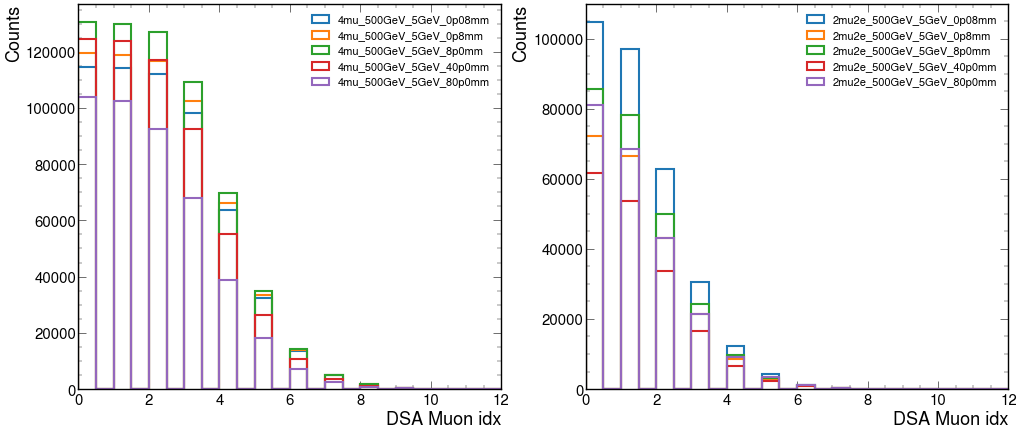

In [6]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("idx", events_4mu[i_4mu].idx, events_2mu2e[i_2mu].idx)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].idx), range=(0,12), alpha=1, bins=24, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].idx), range=(0,12), alpha=1, bins=24, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,12)
ax[1].set_xlim(0,12)
ax[0].set_xlabel('DSA Muon idx')
ax[1].set_xlabel('DSA Muon idx')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/DSA_MUON/Cutbased_ID/idx.png", bbox_inches="tight")

## displacedID

4mu displacedID structure: [[1, 1, 0], [1, 1, 0, 1, 0, 0], [1, 1, 0, ... 1, 1], [1, 1, 1, 1, 0], [0, 1, 1, 1]]
2mu2e displacedID structure: [[1, 0, 0, 0, 1], [1, 1], [1, 1, 0, 1], [0, ... [1, 1], [1, 1], [1, 0], [1, 1, 0]]
4mu displacedID structure: [[1, 0, 1, 1, 1], [0, 1, 1, 0, 1], [0, 1, ... [1, 1, 0, 1, 1, 0, 0, 0], [0, 1, 0]]
2mu2e displacedID structure: [[1], [0, 0, 1, 1], [1, 0, 0, 1, 1], [1, ... [1, 1, 1], [0, 1, 1, 1, 0, 0], [1, 1]]
4mu displacedID structure: [[1, 1, 1, 1, 1, 1, 0, 1, 1], [1, 1, 1, 1, ... [0, 1, 0, 1, 1], [1, 0, 1, 0, 1, 1]]
2mu2e displacedID structure: [[0, 1], [0, 1], [0, 1], [0], [1, 0, 1, ... 1], [1, 1, 0], [0, 1], [1, 1, 1, 1, 0]]
4mu displacedID structure: [[1, 1, 1, 0], [1, 0, 1], [0, 1, 1], [0, ... [1], [0, 1, 1, 1, 1, 1, 1], [1, 1, 1]]
2mu2e displacedID structure: [[0, 1, 0, 1, 1], [1, 0, 1], [1, 0, 1], ... [1, 0, 0, 1, 0, 0], [1, 1], [0, 0]]
4mu displacedID structure: [[0, 1, 1], [0, 1, 0, 0, 0], [1, 0, 0, 0, ... 1, 1], [1, 0, 0, 1, 0], [0, 1, 0, 1]]

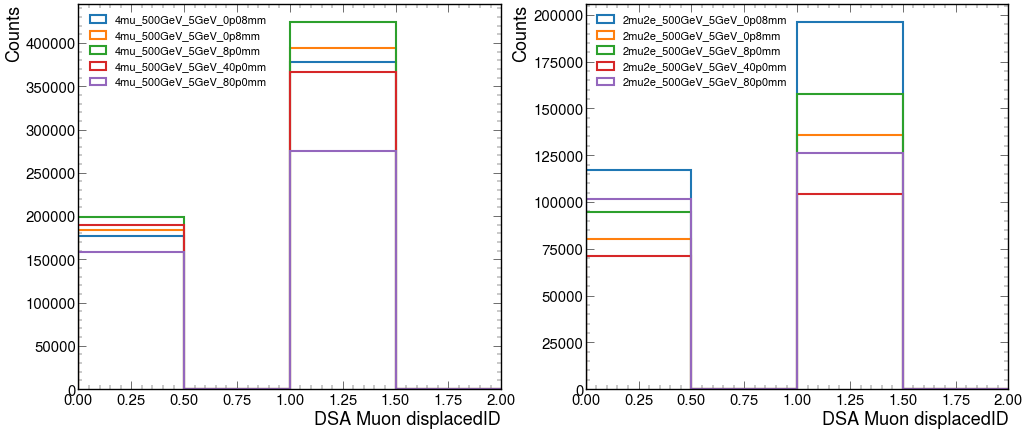

In [8]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("displacedID", events_4mu[i_4mu].displacedID, events_2mu2e[i_2mu].displacedID)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].displacedID), range=(0,2), alpha=1, bins=4, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].displacedID), range=(0,2), alpha=1, bins=4, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,2)
ax[1].set_xlim(0,2)
ax[0].set_xlabel('DSA Muon displacedID')
ax[1].set_xlabel('DSA Muon displacedID')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/DSA_MUON/Cutbased_ID/displacedID.png", bbox_inches="tight")